[0.6        0.7        0.93333333 0.8        0.63333333]
0.7333333333333333


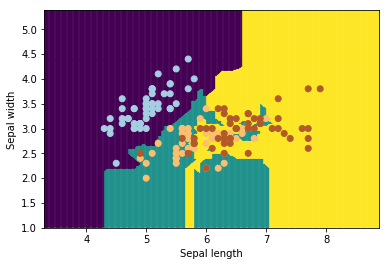

In [9]:
#Basado en: https://www.eduonix.com/dashboard/complete-guide-to-machine-learning-using-python
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) 

knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', p=1)
k_fold = KFold(n_splits=5, shuffle=True)

results = cross_val_score(knn, X, y, cv=k_fold)
print(results)

knn.fit(X_train, y_train)
scoreValue = knn.score(X_test, y_test)
print(scoreValue)

h = .02
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.subplot(1, 1, 1)
plt.pcolormesh(xx, yy, Z, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()



In [11]:
## 7.4
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split, KFold
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:,2:4]
y = iris.data[:,1]

scaler = MinMaxScaler(feature_range=(0, 1))

x_scaled = scaler.fit_transform(X)

kf = KFold(n_splits=3)
kf.get_n_splits(x_scaled)

run = 1
# x_train, x_test, y_train,  y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
for train_index, test_index in kf.split(x_scaled):
    x_train = x_scaled[train_index]
    y_train = y[train_index]

    x_test = x_scaled[test_index]
    y_test = y[test_index]

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)

    for K in range(1,11):

        model = KNeighborsRegressor(n_neighbors = K)
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        error = np.sqrt(mean_squared_error(y_test,prediction)) # Root MSE

        model_scaled = KNeighborsRegressor(n_neighbors = K)
        model_scaled.fit(x_train_scaled, y_train)
        prediction_scaled = model.predict(x_test_scaled)
        error_scaled = np.sqrt(mean_squared_error(y_test,prediction_scaled)) # Root MSE

        print("Fold: %s, K: %s, RMSE: %s, RMSE_Scaled: %s" % (run, K, error, error_scaled))
    run += 1


Fold: 1, K: 1, RMSE: 1.0302426898551622, RMSE_Scaled: 0.8794316346368262
Fold: 1, K: 2, RMSE: 1.0768936809174805, RMSE_Scaled: 1.0069011868103046
Fold: 1, K: 3, RMSE: 1.0856334556377674, RMSE_Scaled: 0.9761602782785668
Fold: 1, K: 4, RMSE: 1.0388936422945323, RMSE_Scaled: 0.9992809915133981
Fold: 1, K: 5, RMSE: 1.1232274925410257, RMSE_Scaled: 0.9958473778647007
Fold: 1, K: 6, RMSE: 1.116950212756942, RMSE_Scaled: 0.9873983773308298
Fold: 1, K: 7, RMSE: 1.1269626870305798, RMSE_Scaled: 0.9696664690626825
Fold: 1, K: 8, RMSE: 1.132651755836718, RMSE_Scaled: 0.9711848433743188
Fold: 1, K: 9, RMSE: 1.1098848789151263, RMSE_Scaled: 0.962536515260526
Fold: 1, K: 10, RMSE: 1.0852317724799625, RMSE_Scaled: 0.9452385942184123
Fold: 2, K: 1, RMSE: 0.6138403701289121, RMSE_Scaled: 0.7159608927867498
Fold: 2, K: 2, RMSE: 0.5061126356849827, RMSE_Scaled: 0.6321392251711643
Fold: 2, K: 3, RMSE: 0.48009258366370217, RMSE_Scaled: 0.6105916984550496
Fold: 2, K: 4, RMSE: 0.41683330001332664, RMSE_Scale